In [35]:
import pandas as pd

health_data = pd.read_csv("Health Dataset Python\Health Dataset Python\Health_dataset.csv")


<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\sambh\AppData\Local\Temp\ipykernel_14600\1840057947.py:3: SyntaxWarning: invalid escape sequence '\H'
  health_data = pd.read_csv("Health Dataset Python\Health Dataset Python\Health_dataset.csv")


In [36]:
health_data.head(10)

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28
5,PAT-00006,Male,Heart Disease,Dialysis,City General Hospital,2022-02-07,2022-02-15,Deceased,Multiple Organ Failure,1962-04-06
6,PAT-00007,Female,Tuberculosis,Dialysis,City General Hospital,2022-06-07,2022-06-30,Recovered,NaN,1967-10-06
7,PAT-00008,Female,Heart Disease,Dialysis,City General Hospital,2022-06-26,2022-06-27,Recovered,NaN,2018-12-15
8,PAT-00009,Female,Cancer,Dialysis,City General Hospital,2023-07-21,2023-08-07,Recovered,NaN,1976-02-01
9,PAT-00010,Female,Malaria,Dialysis,City General Hospital,2023-12-25,2024-01-05,Recovered,NaN,2009-01-27


In [37]:
#count the number of patients
total_records = health_data['Patient ID'].count()
print('Total patients:',total_records)

Total patients: 8000


In [38]:
gender_count = health_data['Gender'].value_counts()
print(gender_count)

Gender
Male      5206
Female    2794
Name: count, dtype: int64


In [39]:
import matplotlib.pyplot as plt

<Axes: xlabel='Gender'>

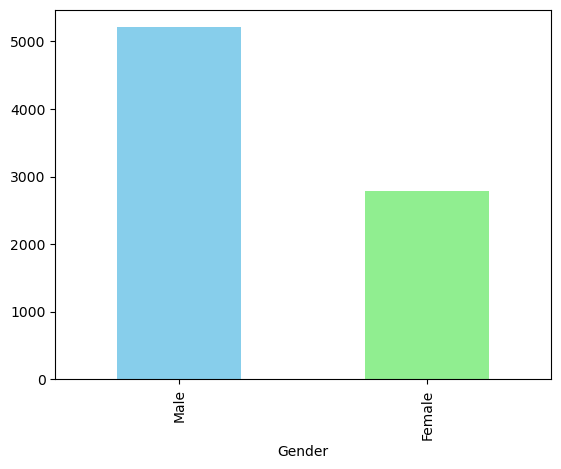

In [40]:
gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])

In [41]:
# patients age group by total visit
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date']) 
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days / 365.25

# bins to sort out each individual by their age
bins = [0,20,40,60,80,100]
labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]

# using pd.cut to perform binning
health_data["Age_Group"] = pd.cut(health_data['Age'], bins=bins, labels=labels, right=False)
age_count = health_data['Age_Group'].value_counts()
print(age_count)

Age_Group
20-40     1646
40-60     1608
80-100    1603
60-80     1580
0-20      1533
Name: count, dtype: int64


In [42]:
#disease count
disease_count = health_data['Disease'].value_counts()
print(disease_count)

Disease
Malaria           1193
Asthma             966
Tuberculosis       864
Diabetes           694
Cancer             691
Typhoid            680
Heart Disease      567
Stroke             493
HIV/AIDS           488
Kidney Failure     475
Pneumonia          246
Liver Disease      244
Hypertension       173
COVID-19           157
Dengue              69
Name: count, dtype: int64


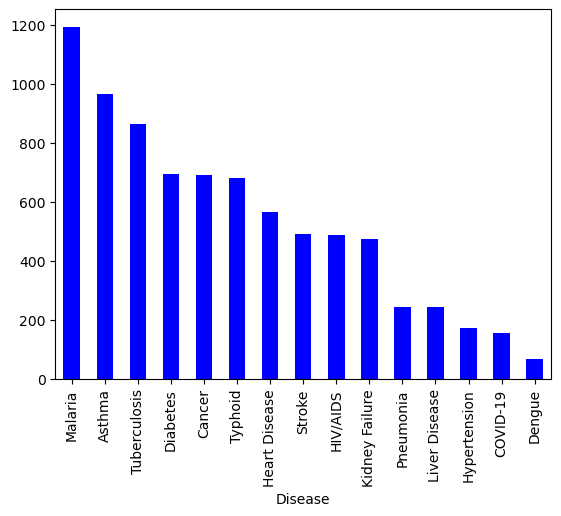

In [43]:
ax = disease_count.plot(kind='bar', color='blue')

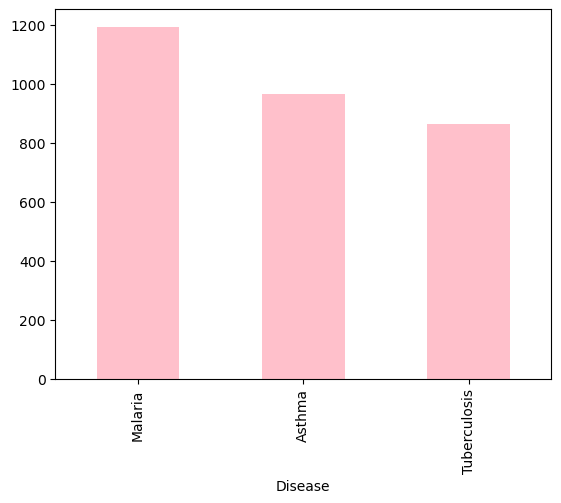

In [44]:
# getting the top 3 common diseases
disease_top3 = health_data['Disease'].value_counts().nlargest(3)
ab = disease_top3.plot(kind='bar', color='pink')

In [45]:
#showing the top 3 as percentages
total_disease_records = health_data['Disease'].count()
total_records_top3 = disease_top3

percentage = (total_records_top3/total_disease_records) * 100

roundedPerc = percentage.round(0).astype(int)


print(roundedPerc)

Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int32


In [46]:
#diseases accordingly to gender using crosstab

gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])

print(gender_disease)

Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441
